<a href="https://colab.research.google.com/github/ninja03jod/Machine_Learning_Projects/blob/main/Decision_Tree_Fastag_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/content/FastagFraudDetection.csv")
df

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,1/1/2023 22:18,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud
4996,4997,1/17/2023 13:43,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud
4997,4998,2/5/2023 5:08,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud
4998,4999,2/20/2023 20:34,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud


In [4]:
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [6]:
df[df.FastagID.duplicated()]

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
9,10,1/15/2023 7:30,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",72,KA22ST6789,Not Fraud
16,17,1/22/2023 16:45,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",62,KA20GH1345,Not Fraud
23,24,1/29/2023 3:05,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",77,KA77UV0123,Not Fraud
30,31,2/5/2023 13:20,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",57,KA92IJ5789,Not Fraud
37,38,2/12/2023 23:35,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",85,KA15IJ6789,Not Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4966,4967,8/31/2023 6:08,Motorcycle,NaN,D-106,Regular,Small,0,0,"13.21331620748757, 77.55413526894684",47,AP34MN6789,Not Fraud
4973,4974,12/27/2023 19:04,Motorcycle,NaN,D-106,Regular,Small,0,0,"13.21331620748757, 77.55413526894684",84,AP01AB4567,Not Fraud
4980,4981,4/20/2023 6:01,Motorcycle,NaN,D-106,Regular,Small,0,0,"13.21331620748757, 77.55413526894684",74,AP78OP2345,Not Fraud
4987,4988,8/19/2023 18:57,Motorcycle,NaN,D-106,Regular,Small,0,0,"13.21331620748757, 77.55413526894684",90,AP45CD0123,Not Fraud


In [14]:
# convert time stamp into --> day of week, hours and month
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
df['Month'] = df['Timestamp'].dt.month

In [10]:
df.FastagID = df.FastagID.fillna('Not Specified')

In [15]:
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Hour,DayOfWeek,Month
0,1,2023-01-06 11:20:00,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud,11,4,1
1,2,2023-01-07 14:55:00,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud,14,5,1
2,3,2023-01-08 18:25:00,Motorcycle,Not Specified,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud,18,6,1
3,4,2023-01-09 02:05:00,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud,2,0,1
4,5,2023-01-10 06:35:00,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud,6,1,1


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score,f1_score,classification_report
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder

In [22]:
encode = LabelEncoder()

In [23]:
cat_col = ['Vehicle_Type', 'FastagID', 'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions','Geographical_Location', 'Vehicle_Plate_Number', 'Fraud_indicator']
for i in cat_col:
  df[i] = encode.fit_transform(df[i])

In [12]:
model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [24]:
X = df[['Vehicle_Type','FastagID','TollBoothID','Lane_Type','Vehicle_Dimensions','Transaction_Amount','Amount_paid','Geographical_Location','Vehicle_Speed','Vehicle_Plate_Number','Hour','DayOfWeek','Month']]
y = df['Fraud_indicator']
display(X,y)

,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Hour,DayOfWeek,Month
0,0,2,0,0,0,350,120,3,65,1482,11,4,1
1,1,9,1,1,2,120,100,3,78,3066,14,5,1
2,2,4451,3,1,2,0,0,3,53,3663,18,6,1
3,5,241,2,1,0,350,120,3,92,1498,2,0,1
4,6,2860,1,0,1,140,100,3,60,2409,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5,2596,2,1,0,330,330,4,81,3332,22,6,1
4996,6,2598,1,0,1,125,125,4,64,2288,13,1,1
4997,4,2605,0,1,1,115,115,4,93,2098,5,6,2
4998,3,2676,1,0,0,145,145,4,57,2248,20,0,2


0       0
1       0
2       1
3       0
4       0
       ..
4995    1
4996    1
4997    1
4998    1
4999    0
Name: Fraud_indicator, Length: 5000, dtype: int64

In [26]:
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y)

In [18]:
y_train.value_counts(normalize=True)*100

Not Fraud    80.346667
Fraud        19.653333
Name: Fraud_indicator, dtype: float64

In [19]:
y_test.value_counts(normalize=True)*100

Not Fraud    80.32
Fraud        19.68
Name: Fraud_indicator, dtype: float64

In [27]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [28]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 0, ..., 1, 1, 1])

In [29]:
y_test.values

array([1, 1, 0, ..., 1, 1, 1])

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       246
           1       1.00      1.00      1.00      1004

    accuracy                           1.00      1250
   macro avg       1.00      1.00      1.00      1250
weighted avg       1.00      1.00      1.00      1250



In [45]:
from sklearn import tree
import matplotlib.pyplot as plt

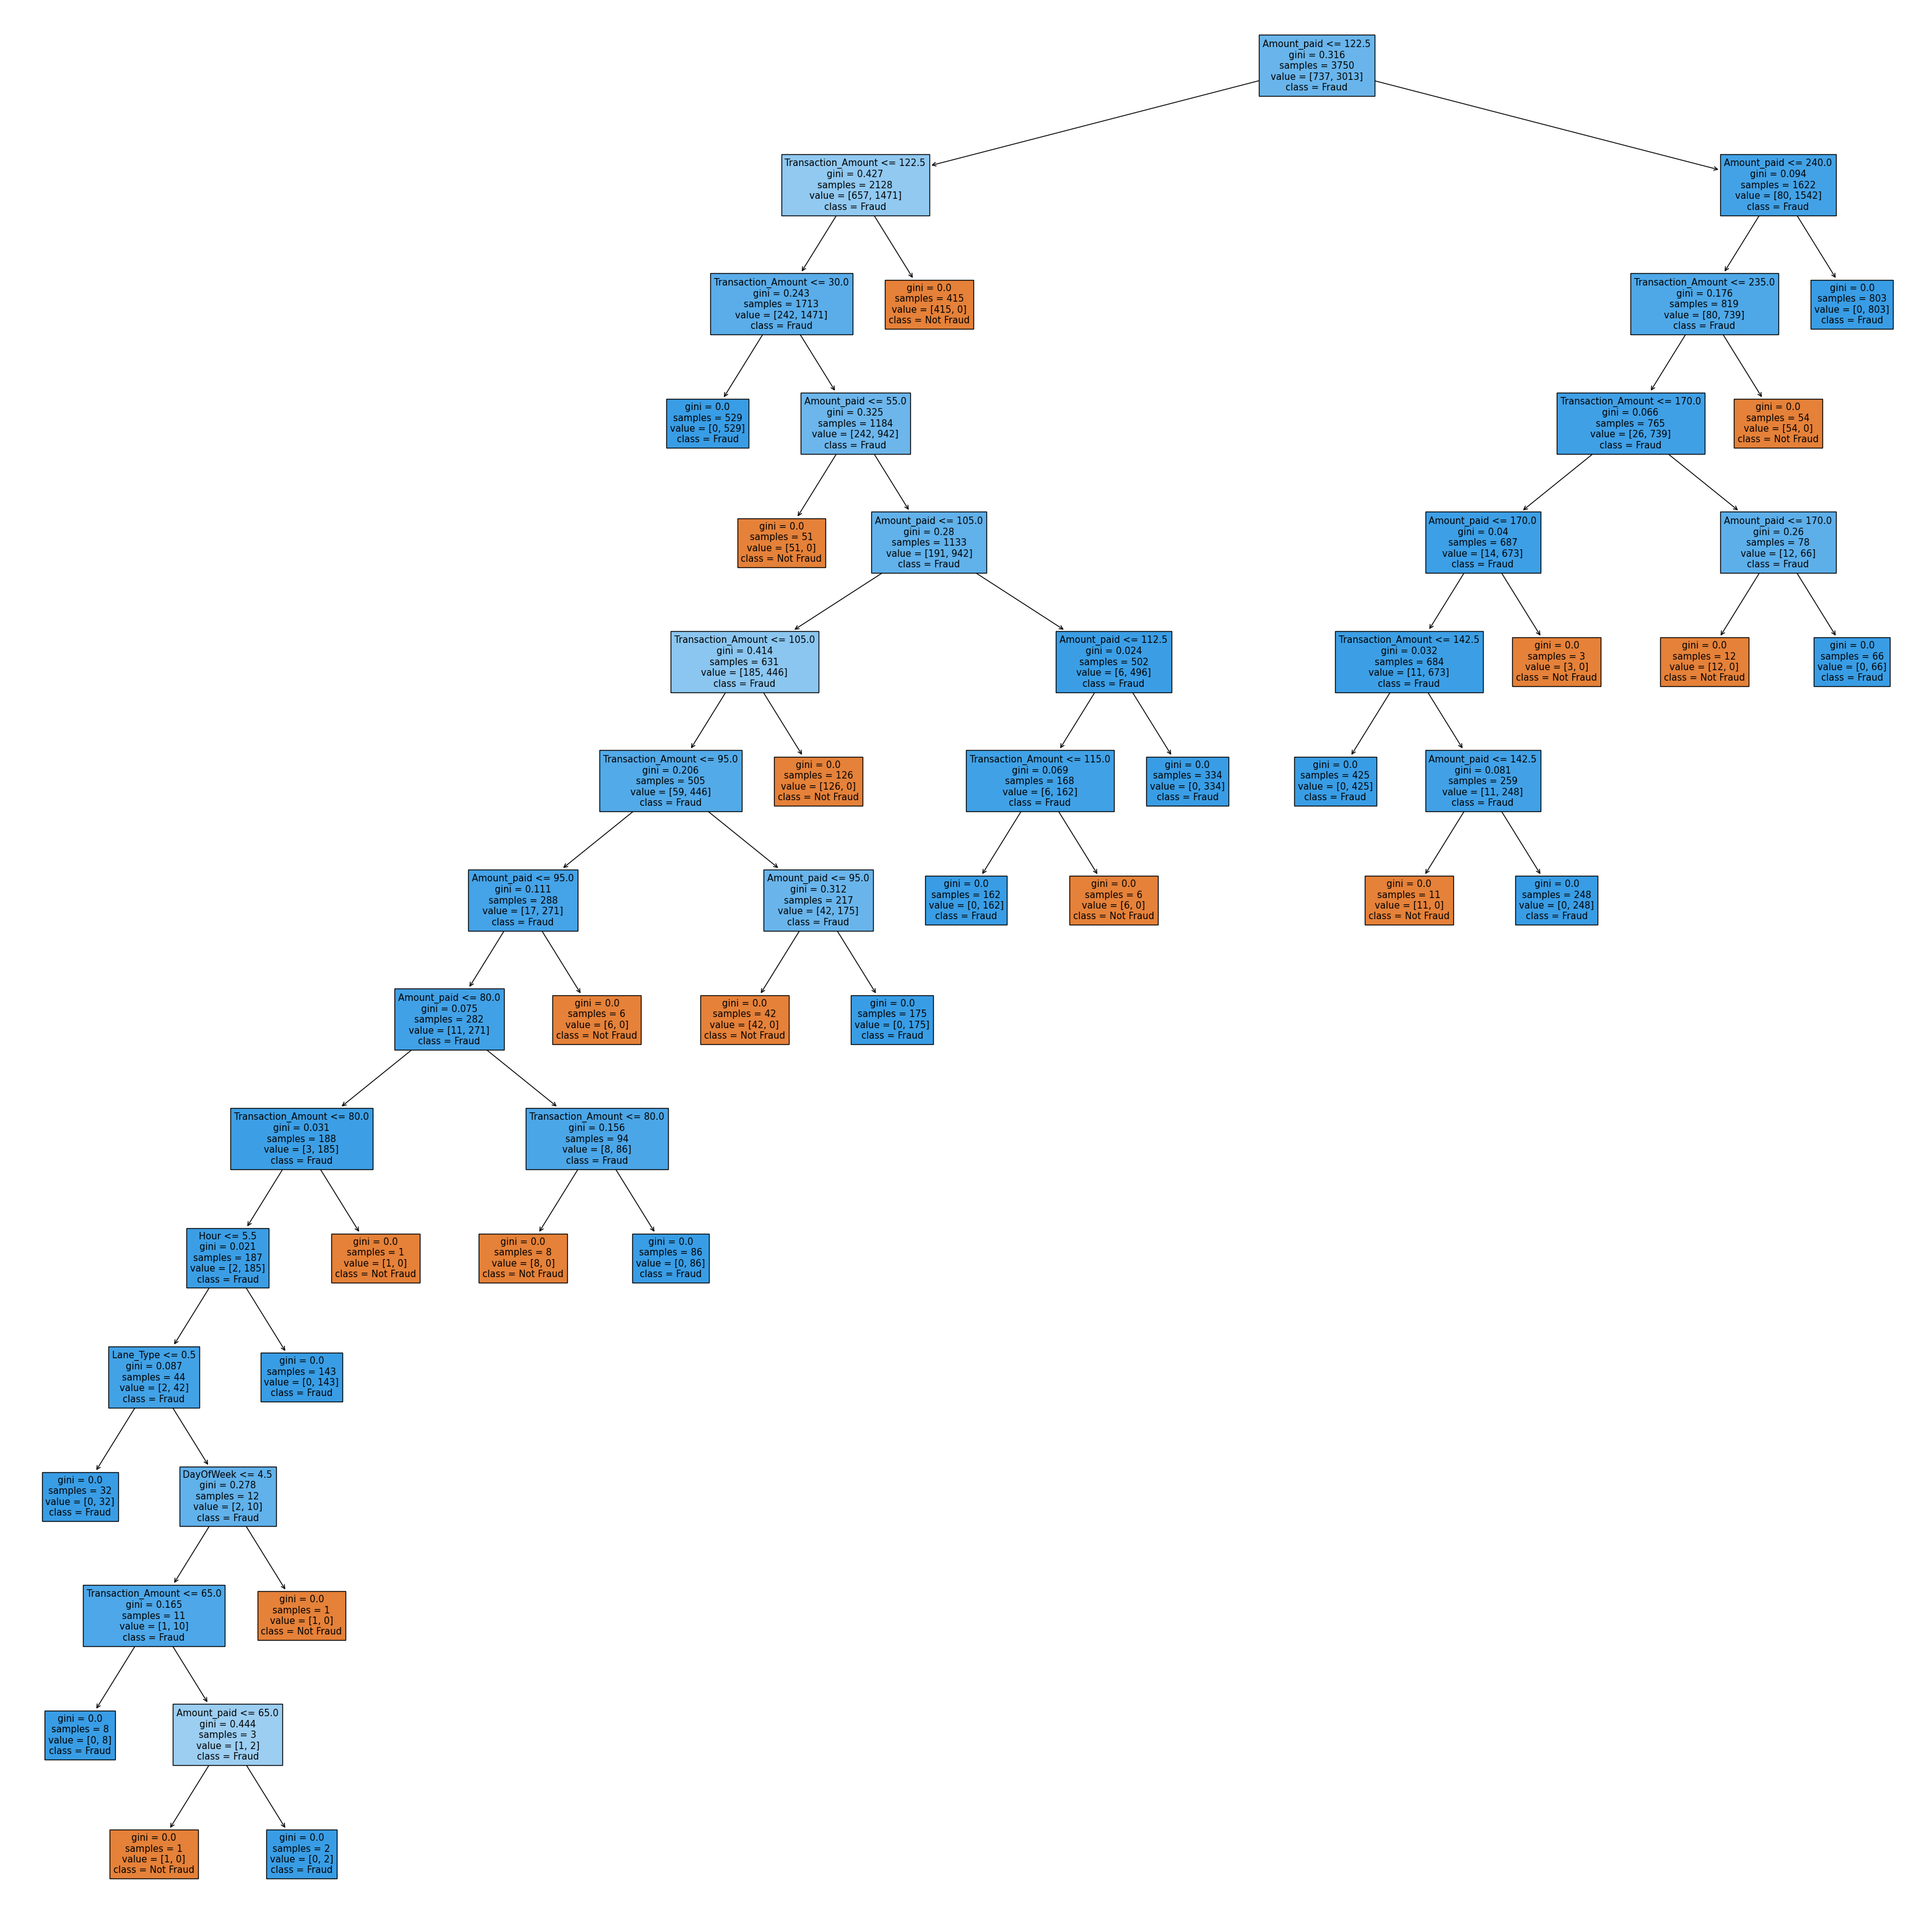

In [48]:
plt.figure(figsize=(40,40))
tree.plot_tree(model,feature_names=X.columns,class_names=['Not Fraud','Fraud'],filled=True);

In [49]:
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Hour,DayOfWeek,Month
0,1,2023-01-06 11:20:00,0,2,0,0,0,350,120,3,65,1482,0,11,4,1
1,2,2023-01-07 14:55:00,1,9,1,1,2,120,100,3,78,3066,0,14,5,1
2,3,2023-01-08 18:25:00,2,4451,3,1,2,0,0,3,53,3663,1,18,6,1
3,4,2023-01-09 02:05:00,5,241,2,1,0,350,120,3,92,1498,0,2,0,1
4,5,2023-01-10 06:35:00,6,2860,1,0,1,140,100,3,60,2409,0,6,1,1


In [52]:
import seaborn as sns
def hist_box_plots(data,col,bins="auto"):
  figure,axis = plt.subplots(ncols=2,figsize=(11,3))

  sns.histplot(data=data,x=col,ax=axis[0],bins=bins)
  sns.boxplot(data=data,x=col,ax=axis[1])

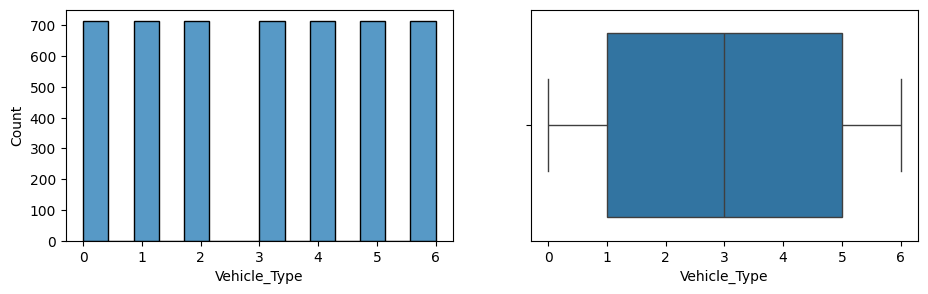

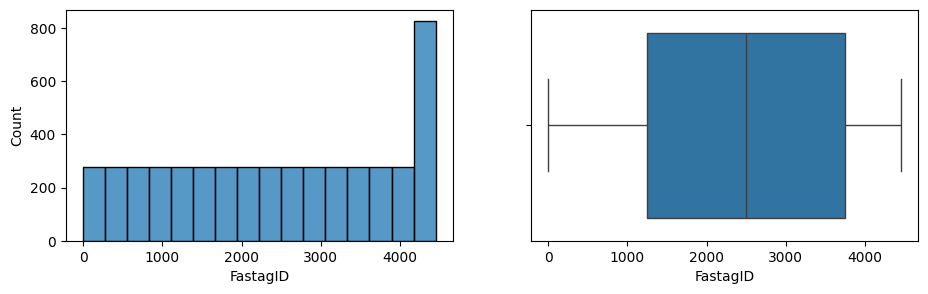

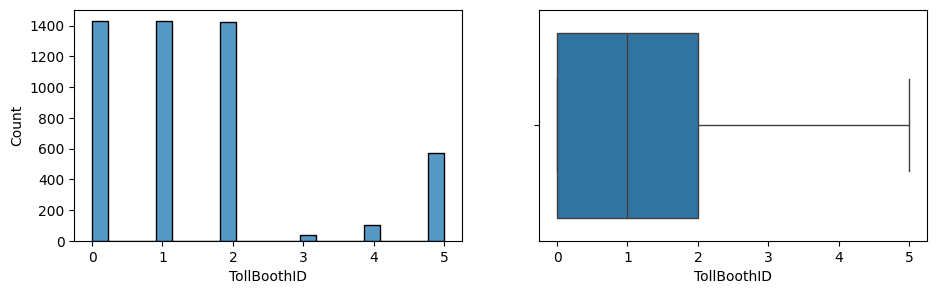

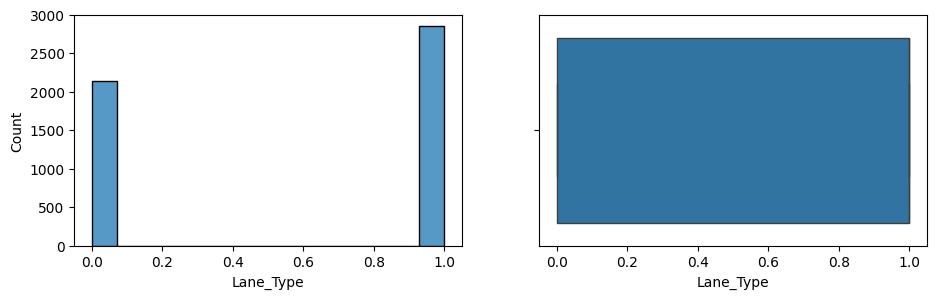

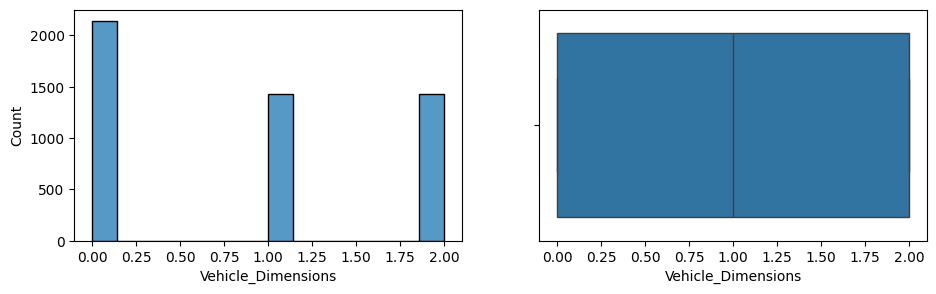

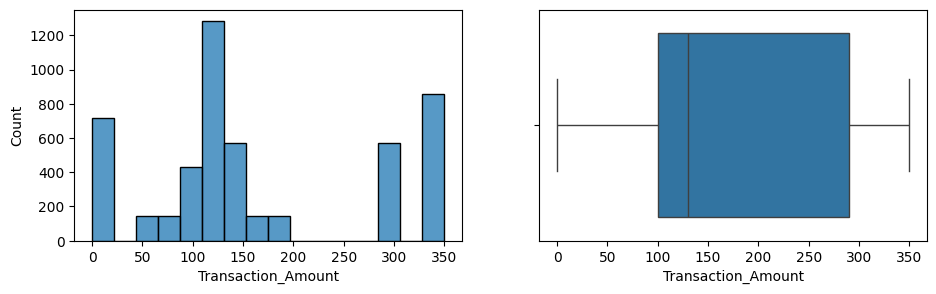

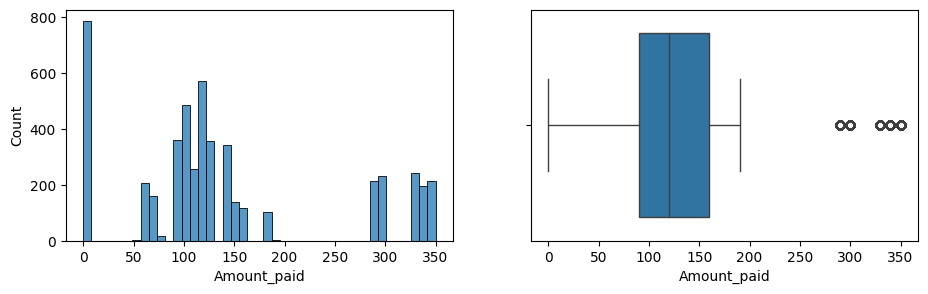

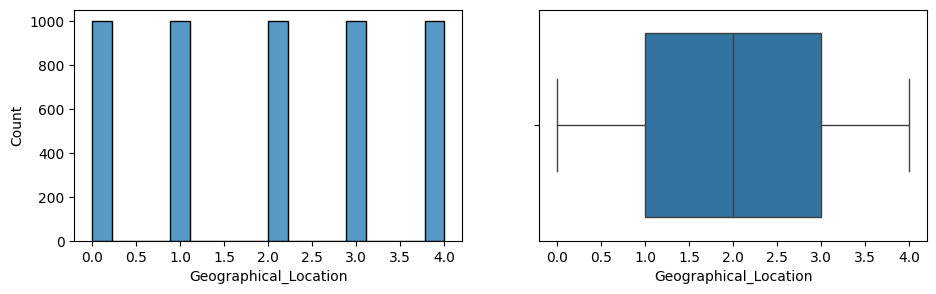

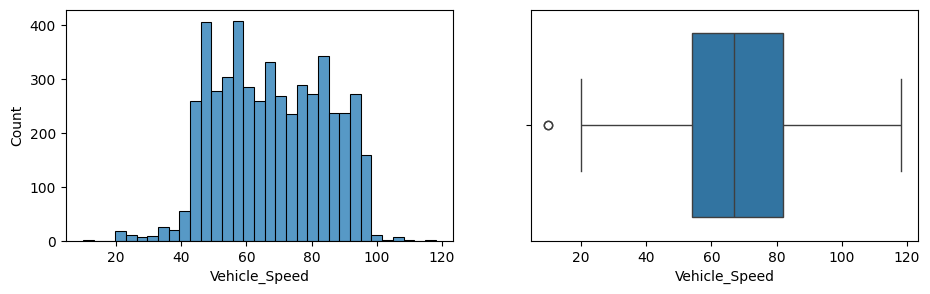

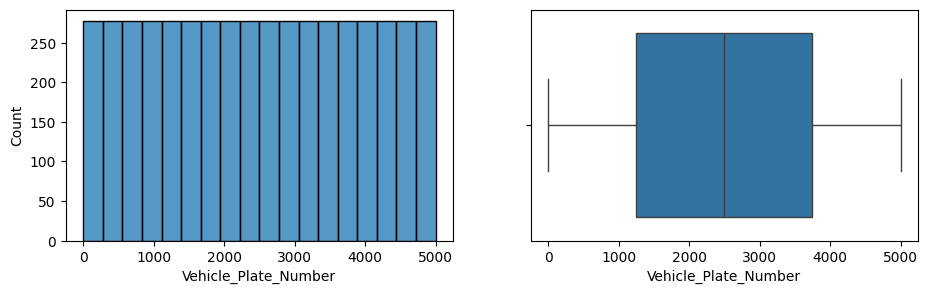

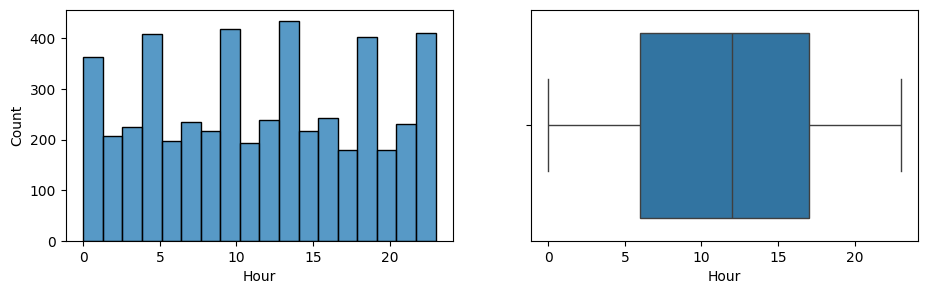

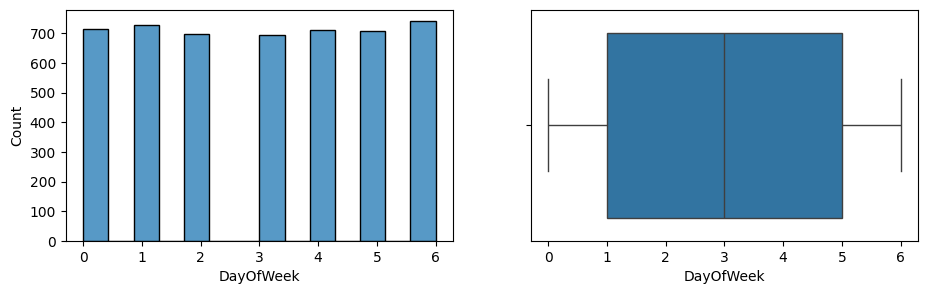

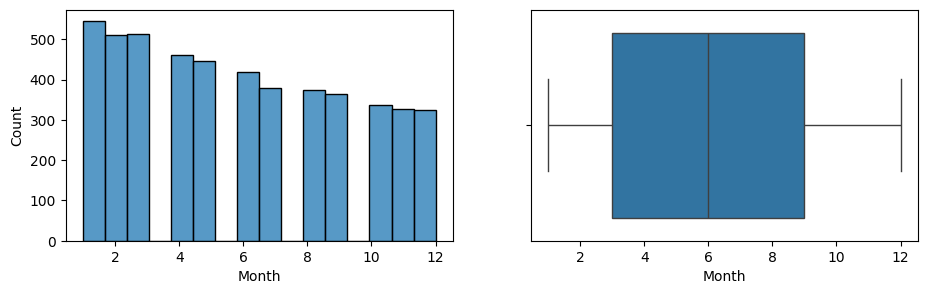

In [53]:
for col in X.columns:
  hist_box_plots(X,col)

<Axes: >

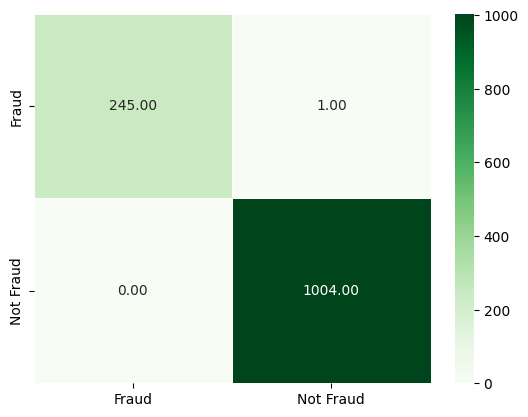

In [59]:
sns.heatmap(data=confusion_matrix(y_test,y_pred),annot=True,fmt=".2f",linewidth=0.7,linecolor='white',cmap="Greens",xticklabels=['Fraud','Not Fraud'],yticklabels=['Fraud','Not Fraud'])